### importing

In [2]:
import pandas as pd
import sklearn.utils
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Downloading Dataset

In [ ]:
# !wget -O weather-stations20140101-20141231.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv

### Reading the data with pandas


In [3]:
pdf = pd.read_csv('weather-stations20140101-20141231.csv')
print(pdf.shape)
pdf.head(5)

(654, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### Cleaning data


In [9]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
print(pdf.shape)
pdf.head(5)

(625, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### data Visualization

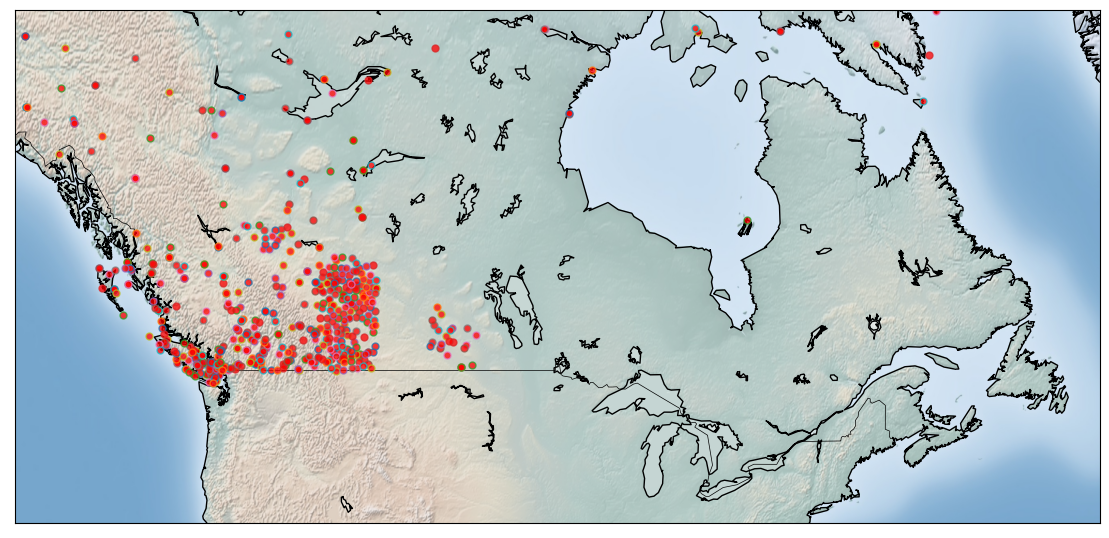

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline


# rcParams defines a runtime configuration (rc) containing the default styles for every plot element you create.
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()


### Clustering of stations based on their location i.e. Lat & Lon

- #### cleaning data and normalizing

In [12]:
sklearn.utils.check_random_state(1000)

Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

- #### Making Model

In [23]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
labels = db.labels_
pdf["Clus_Db"]=labels 
labels[30:40]

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0])

In [32]:
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].tail(10)

,Stn_Name,Tx,Tm,Clus_Db
615,LEROY,1.0,-19.0,-1
616,LIPTON 2,-0.5,-17.9,-1
617,MOOSE JAW CS,3.7,-14.3,-1
618,MUENSTER,1.0,-19.6,-1
619,OXBOW,-0.5,-17.4,-1
620,QU'APPELLE 1,0.0,-16.2,-1
621,REGINA RCS,-0.1,-16.6,-1
622,WATROUS EAST,0.4,-17.5,-1
623,YELLOW GRASS,1.0,-14.5,-1
624,YORKTON,-0.6,-19.3,-1


- #### detecting outliers

In [33]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[50:100]

array([ True, False,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

- #### Number of clusters in labels, ignoring noise if present

In [34]:
realClusterNum = len(set(labels)) - (1 if -1 in labels else 0) 
clusterNum = len(set(labels)) 

realClusterNum

3

### Visualization of clusters based on location



/tmp/ipykernel_3398/4279070377.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])


Cluster 0, Avg Temp: -2.0745856353591154
Cluster 1, Avg Temp: 6.26
Cluster 2, Avg Temp: -9.620000000000001


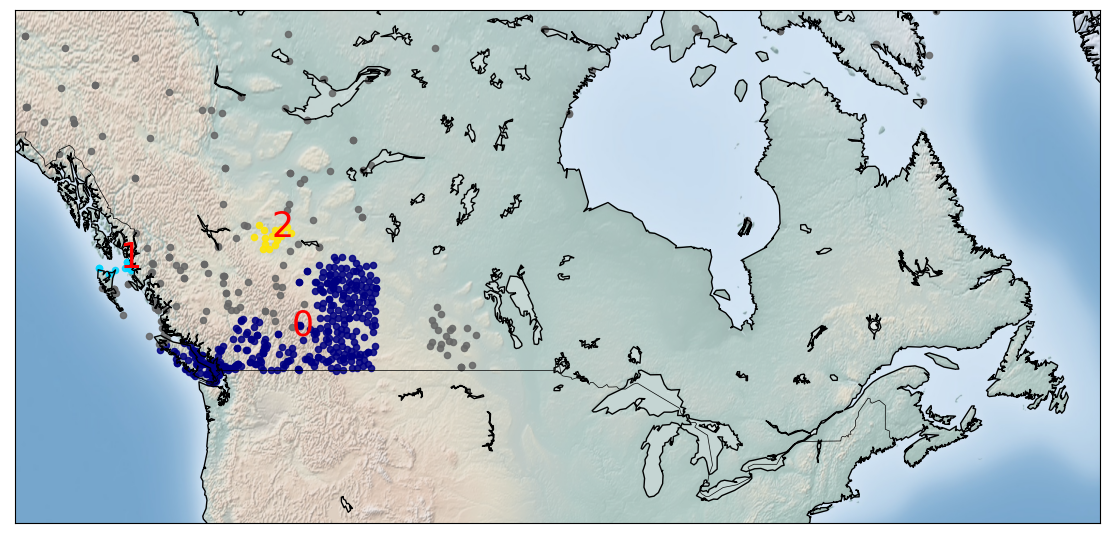

In [35]:
# rcParams defines a runtime configuration (rc) containing the default styles for every plot element you create.
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

### Clustering of stations based on their location, mean, max, and min Temperature
- #### cleaning data and normalizing

In [62]:
sklearn.utils.check_random_state(1000)
Clus_dataSet1 = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet1 = np.nan_to_num(Clus_dataSet1)
Clus_dataSet1 = StandardScaler().fit_transform(Clus_dataSet1)
Clus_dataSet1

array([[-0.65866264, -0.92590077,  0.67652642,  1.31153094,  1.4141711 ],
       [-0.69936685, -0.95075749,  0.90554669,  1.19146297,  1.12718901],
       [-0.69093452, -0.94963901,  1.05822687,  1.17145165,  1.16306177],
       ...,
       [ 1.25079127, -0.29578627, -1.32358392, -1.25992467, -1.1973659 ],
       [ 1.3774844 , -0.72639563, -1.23197582, -0.95975475, -1.02517665],
       [ 1.55643715, -0.39081796, -1.4762641 , -1.44002661, -1.04670031]])

- #### Making Model

In [64]:
db1 = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet1)
labels1 = db1.labels_
pdf["Clus_Db1"]=labels1
labels1[30:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
pdf[["Stn_Name","Tx","Tm","Clus_Db","Clus_Db1"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db,Clus_Db1
0,CHEMAINUS,13.5,8.2,0,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0,0
2,LAKE COWICHAN,16.0,6.8,0,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0,0
4,ESQUIMALT HARBOUR,13.1,8.8,0,0


- #### detecting outliers

In [66]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels1 = db.labels_
labels1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

- #### Number of clusters in labels, ignoring noise if present

In [68]:
realClusterNum=len(set(labels1)) - (1 if -1 in labels1 else 0)
clusterNum = len(set(labels)) 
print(clusterNum)


7


### Visualization of clusters based on location and Temperture


/tmp/ipykernel_3398/2153002295.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])


Cluster 0, Avg Temp: 7.95888888888889
Cluster 1, Avg Temp: 6.561538461538461
Cluster 2, Avg Temp: 3.224444444444445
Cluster 3, Avg Temp: -11.72307692307692
Cluster 4, Avg Temp: -8.169230769230769
Cluster 5, Avg Temp: -4.076744186046512


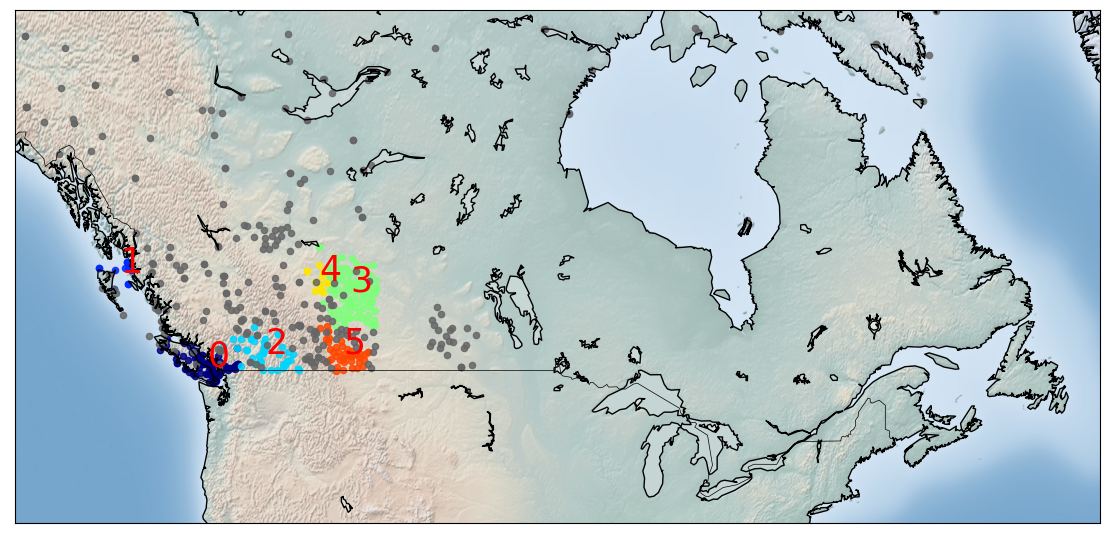

In [69]:
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels1):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db1 == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))